# Train your for classifier for MicroPython

In [1]:
#! pip3 install -U everywhereml
#! pip3 install -U pandas
#! pip3 install -U scikit-learn

### Import your dataset and inspect your data

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/moham/OneDrive/Desktop/Summer School/Project/dataset1.csv", sep=",")
df.head()

,X,Y,Z,GX,GY,GZ,Label
0,0.230,0.086,0.847,-4.272,21.301,-24.719,0
1,0.101,0.152,0.962,22.095,71.228,-22.095,0
2,0.076,0.132,1.078,3.906,11.292,-8.667,0
3,0.063,0.129,0.978,-7.324,-10.864,4.517,0
4,0.110,0.076,1.051,-9.399,-6.042,4.883,0


In [2]:
df.tail()

,X,Y,Z,GX,GY,GZ,Label
507,1.014,0.047,0.008,0.488,-0.122,0.427,3
508,1.008,0.033,0.006,0.488,0.122,0.122,3
509,1.007,0.034,0.013,-0.366,0.183,0.183,3
510,1.005,0.035,0.009,0.549,0.488,0.366,3
511,1.010,0.036,0.006,-0.732,-0.122,0.916,3


* Showing Dot (0)
* Showing Dash (1)
* End of stream for alphabet (2), 
* Showing Space (3)

### Check for class balance

In [3]:
df.Label.value_counts()#/len(df)

0    128
1    128
2    128
3    128
Name: Label, dtype: int64

### Split your data into train and test set to check if your model generalizes

In [14]:
from sklearn.model_selection import train_test_split

X = df[["X", "Y", "Z", "GX", "GY", "GZ"]].iloc[1:].values
y = df.Label.iloc[1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Train your model

In [18]:
from everywhereml.sklearn.ensemble import RandomForestClassifier

max_leaf_nodes = 5
clf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=max_leaf_nodes)

#from sklearn.tree import DecisionTreeClassifier
#clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

print(f'Score: {clf.score(X_test, y_test):3.3f}')

Score: 0.981


### Validate your accuracy

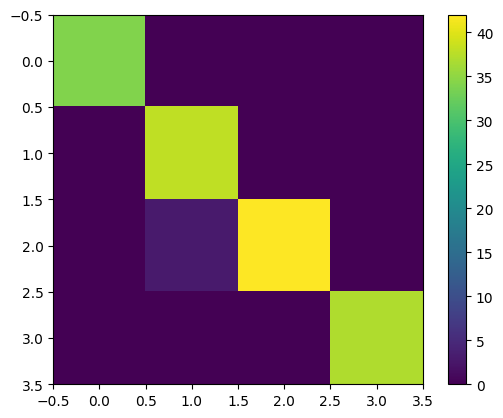

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = y_test
y_pred = clf.predict(X_test)

plt.imshow(confusion_matrix(y_true, y_pred))
plt.colorbar()

### Export your model to MicoPython

In [ ]:
clf.to_micropython_file("MyModel.py")

In [10]:
clf.predict([[0,0,0]])

array([0])